In [132]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress

In [190]:
err_sg_vs_sg = np.loadtxt("../../experiments/err/err_sg_vs_sg.txt", delimiter=' ')
err_sob_vs_sg = np.loadtxt("../../experiments/err/err_sobol_vs_sg.txt", delimiter=' ')
err_hal_vs_sg = np.loadtxt("../../experiments/err/err_halton_vs_sg.txt", delimiter=' ')

linregress_sg = linregress(np.log(err_sg_vs_sg[:,0]), np.log(err_sg_vs_sg[:,1]))
linregress_sob = linregress(np.log(err_sob_vs_sg[:,0]), np.log(err_sob_vs_sg[:,1]))
linregress_hal = linregress(np.log(err_hal_vs_sg[:,0]), np.log(err_hal_vs_sg[:,1]))

slope_sg = linregress_sg.slope
slope_sob = linregress_sob.slope
slope_hal = linregress_hal.slope

intercept_sg = linregress_sg.intercept
intercept_sob = linregress_sob.intercept
intercept_hal = linregress_hal.intercept

print("rate sg:",slope_sg)
print("rate sob:",slope_sob)
print("rate hal:",slope_hal)

print(math.exp(linregress(np.log(err_hal_vs_sg[:,0]), np.log(err_hal_vs_sg[:,1])).intercept))

c = 0.6

rate_sg = c*math.exp(intercept_sg)*err_sg_vs_sg[:,0]**slope_sg
rate_sob = math.exp(intercept_sob)*err_sob_vs_sg[:,0]**slope_sob
rate_hal = c*math.exp(intercept_hal)*err_hal_vs_sg[:,0]**slope_hal

rate = np.array([err_halton_vs_sg[0,0],err_halton_vs_sg[hal_len-1,0]])

rate1 = c*rate**(-1) 
rate2 = 0.01*c*rate**(-2) 

rate sg: -1.333739416037671
rate sob: -1.3224844047637103
rate hal: -0.8471841763528967
0.014535939454389185


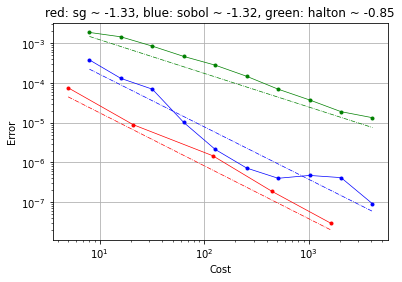

In [191]:
fig, ax = plt.subplots()

ax.loglog(err_sg_vs_sg[:,0], err_sg_vs_sg[:,1],'r.')
ax.loglog(err_sg_vs_sg[:,0], err_sg_vs_sg[:,1],'r-',lw=0.7)
ax.loglog(err_sg_vs_sg[:,0], rate_sg,'r-.',lw=0.7)

ax.loglog(err_sob_vs_sg[:,0], err_sob_vs_sg[:,1],'b.')
ax.loglog(err_sob_vs_sg[:,0], err_sob_vs_sg[:,1],'b-',lw=0.7)
ax.loglog(err_sob_vs_sg[:,0], rate_sob,'b-.',lw=0.7)

ax.loglog(err_hal_vs_sg[:,0], err_hal_vs_sg[:,1],'g.')
ax.loglog(err_hal_vs_sg[:,0], err_hal_vs_sg[:,1],'g-',lw=0.7)
ax.plot(err_hal_vs_sg[:,0], rate_hal,'g-.',lw=0.7)

#ax.loglog(rate, rate1,'k-.',lw=0.7)
#ax.loglog(rate, rate2,'k-.',lw=0.7)

slope_sg = round(slope_sg,2)
slope_sob = round(slope_sob,2)
slope_hal = round(slope_hal,2)
title = "red: sg ~ " + str(slope_sg) + ", blue: sobol ~ " +  str(slope_sob) + ", green: halton ~ " + str(slope_hal)

ax.set_title(title)
ax.set(xlabel="Cost", ylabel='Error')
ax.grid()

fig.savefig("../../experiments/pic/err.png",dpi = 400)
plt.show()

In [7]:
gamma = np.log(np.loadtxt("../../experiments/err/gamma.txt", delimiter=' '))
num = np.arange(1, 101, dtype=float)

c = 1

rate_d1 =  np.log(c*num**(-1))
rate_d2 =  np.log(c*num**(-2))

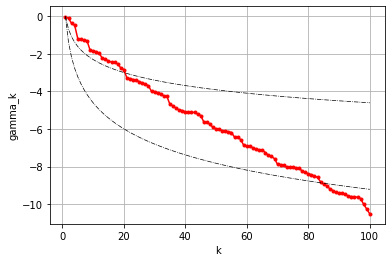

In [8]:
fig, ax = plt.subplots()

ax.plot(num, gamma,'r.')
ax.plot(num, gamma,'r-')
ax.plot(num, rate_d1,'k-.',lw=0.7)
ax.plot(num, rate_d2,'k-.',lw=0.7)

#ax.set_title("blue: Halton, red: Sobol")
ax.set(xlabel="k", ylabel='gamma_k')
ax.grid()

fig.savefig("../../experiments/pic/rate.png",dpi = 400)
plt.show()
